In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


file=pd.read_csv('Cnn_data.csv')
# Assuming the target column is the last one: "Absenteeism Time in Hours"
# Separate features (X) and target (y)
X = file.iloc[:, :-1]
y = file.iloc[:, -1]

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier (default n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, knn.predict(X_train_scaled))

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")


Training Set Accuracy: 0.7714285714285715
Test Set Accuracy: 0.8071428571428572


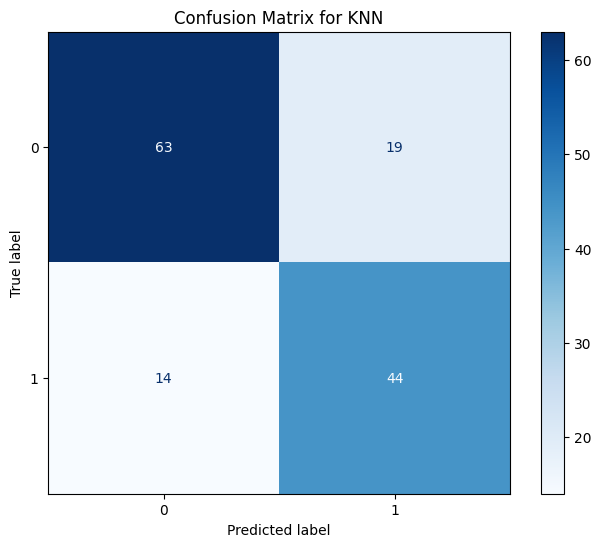

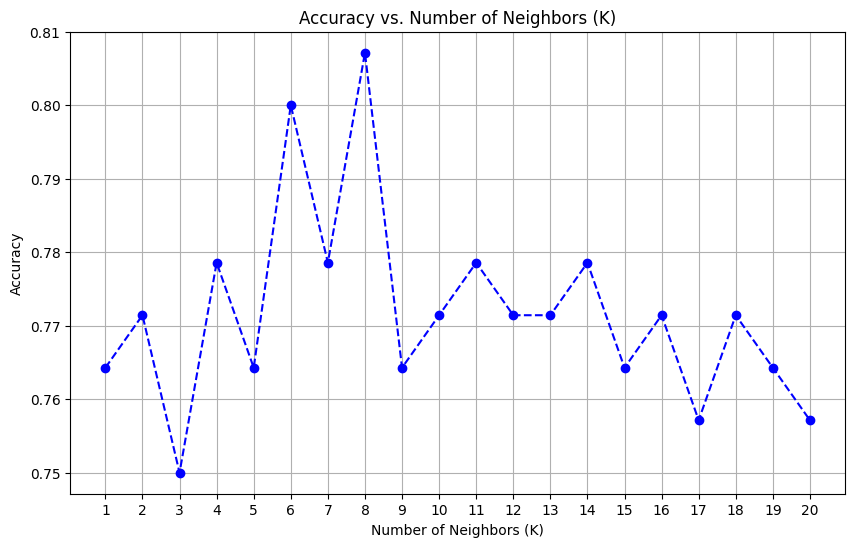

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, cmap="Blues", ax=ax)
plt.title("Confusion Matrix for KNN")
plt.show()

# Accuracy vs. Number of Neighbors
accuracies = []
neighbors_range = range(1, 21)
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracies, marker='o', linestyle='--', color='b')
plt.title("Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(neighbors_range)
plt.grid()
plt.show()
